In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as ex
import plotly.graph_objects as go
import numpy as np

In [151]:
#Importing dataset and displaying the first10 rows
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv',header=None,
                   names=['Date', 'AverageTemperature', 'AverageTemperatureUncertainty','Country'])
df[:10]

,Date,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [152]:
df.describe(include='all')

,Date,AverageTemperature,AverageTemperatureUncertainty,Country
count,577462,544811.000000,545550.000000,577462
unique,3239,NaN,NaN,243
top,1977-05-01,NaN,NaN,Montenegro
freq,243,NaN,NaN,3239
mean,NaN,17.193354,1.019057,NaN
std,NaN,10.953966,1.201930,NaN
min,NaN,-37.658000,0.052000,NaN
25%,NaN,10.025000,0.323000,NaN
50%,NaN,20.901000,0.571000,NaN
75%,NaN,25.814000,1.206000,NaN


In [153]:
#plot to visualize the distribution for the labels
distri = df.groupby(['Country'])['AverageTemperature'].mean()
distri[:10]

Country
Afghanistan            14.045007
Africa                 24.074203
Albania                12.610646
Algeria                22.985112
American Samoa         26.611965
Andorra                11.201553
Angola                 21.824549
Anguilla               26.610492
Antarctica                   NaN
Antigua And Barbuda    26.437924
Name: AverageTemperature, dtype: float64

In [154]:
distri.describe()

count    242.000000
mean      18.563889
std        9.195909
min      -18.587458
25%       10.436705
50%       22.680002
75%       26.104407
max       28.816603
Name: AverageTemperature, dtype: float64

In [155]:
finland=df.loc[df['Country'] == 'Finland']

In [156]:
fig = ex.line(finland, x = 'Date', y = 'AverageTemperature')
fig.show()

In [157]:
def getYear(s):
    return s.split("-")[0]

df['Year']= df['Date'].apply(lambda x: getYear(x))

In [158]:
distri = df.groupby(['Year'])['AverageTemperature'].mean()

In [159]:
fig = ex.line(distri, y = 'AverageTemperature')
fig.show()

In [160]:
smooth_temp=[]
for i in range (113):
    list_years=[]
    for j in range (10):
        list_years.append(distri[-(i+j)])
    smooth_temp.append(np.mean(list_years))
smooth_temp.reverse()
smooth_temp.pop()
X=[i for i in range (2013-len(smooth_temp),2013)]

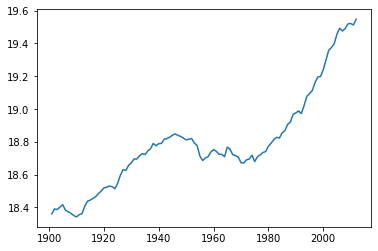

In [161]:
plt.plot(X,smooth_temp)

In [162]:
trace = go.Scatter(
                    x = X,
                    y = smooth_temp,
                    mode = "lines",
                    name = "Average_temperature")

data = [trace]

# Plot and embed in ipython notebook!
plotly.offline.iplot(data, filename='basic-scatter')